In [ ]:
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt

import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas_profiling
from pandas_profiling import ProfileReport

import re
# For handling string
import string
# For performing mathematical operations
import math

import sklearn
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

import scipy


from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [ ]:
# Importing dataset
df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/spamraw_train.csv') 
df_test=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/spamraw_test.csv')

print("Shape of data=>",df.shape)
print("Shape of data=>",df_test.shape)
#Reference:https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/=--

In [ ]:
test_df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/spamraw_test.csv')


In [ ]:
#Check if data is imbalanced
df['spam'].value_counts()

In [4]:
# Remove ,,, from entries in name column
df['sms_text'] = df['sms_text'].str.replace(r'\,,,','')
df['sms_text'].unique()

array(['Hope you are having a good week. Just checking in',
       'K..give back my thanks.',
       'Am also doing in cbe only. But have to pay.', ...,
       "If you're not in my car in an hour and a half I'm going crazy",
       'Mm umma ask vava also to come tell him can play later together',
       "There generally isn't one. It's an uncountable noun - u in the dictionary. pieces of research?"],
      dtype=object)

In [5]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['sms_text'][i])
    print()
    i=i+1
    


Review Number  0

Hope you are having a good week. Just checking in

Review Number  1

K..give back my thanks.

Review Number  2

Am also doing in cbe only. But have to pay.

Review Number  3

complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+

Review Number  4

okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm

Review Number  5

Aiya we discuss later lar... Pick u up at 4 is it?

Review Number  6

Are you this much buzy

Review Number  7

Please ask mummy to call father

Review Number  8

Marvel Mobile Play the official Ultimate Spider-man game (£4.50) on ur mobile right now. Text SPIDER to 83338 for the game & we ll send u a FREE 8Ball wallpaper

Review Number  9

fyi I'm at usf now, swing by the room whenever

Review Number  10

Sure thing big man. i have hockey elections at 

In [6]:
#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['sms_text']=df['sms_text'].apply(lambda x:expand_contractions(x))

In [7]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['sms_text'][i])
    print()
    i=i+1
    

Review Number  0

Hope you are having a good week. Just checking in

Review Number  1

K..give back my thanks.

Review Number  2

Am also doing in cbe only. But have to pay.

Review Number  3

complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+

Review Number  4

okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 150ppm

Review Number  5

Aiya we discuss later lar... Pick u up at 4 is it?

Review Number  6

Are you this much buzy

Review Number  7

Please ask mummy to call father

Review Number  8

Marvel Mobile Play the official Ultimate Spider-man game (£4.50) on ur mobile right now. Text SPIDER to 83338 for the game & we ll send u a FREE 8Ball wallpaper

Review Number  9

fyi I am at usf now, swing by the room whenever

Review Number  10

Sure thing big man. i have hockey elections at

In [8]:
#Lowercase letters
df['sms_text']=df['sms_text'].str.lower()


In [9]:
#Remove digits and words containing digits 
df['sms_text']=df['sms_text'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [10]:
#Remove Punctuations
df['sms_text']=df['sms_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [11]:
#Check first 30 reviews after cleaning 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['sms_text'][i])
    print()
    i=i+1

Review Number  0

hope you are having a good week just checking in

Review Number  1

kgive back my thanks

Review Number  2

am also doing in cbe only but have to pay

Review Number  3

complimentary  star ibiza holiday or £ cash needs your urgent collection  now from landline not to lose out 

Review Number  4

okmail dear dave this is your final notice to collect your  tenerife holiday or  cash award call  from landline tcs sae   

Review Number  5

aiya we discuss later lar pick u up at  is it

Review Number  6

are you this much buzy

Review Number  7

please ask mummy to call father

Review Number  8

marvel mobile play the official ultimate spiderman game £ on ur mobile right now text spider to  for the game  we ll send u a free  wallpaper

Review Number  9

fyi i am at usf now swing by the room whenever

Review Number  10

sure thing big man i have hockey elections at  shouldn€˜t go on longer than an hour though

Review Number  11

i anything lor

Review Number  12

by march en

In [20]:
#Word Count

df['word_count'] = df['sms_text'].apply(lambda x: len(str(x).split(" ")))
df[['sms_text','word_count']].head()

,sms_text,word_count
0,hope good week checking,4
1,kgive back thanks,3
2,also cbe pay,3
3,complimentary star ibiza holiday £ cash need u...,11
4,okmail dear dave final notice collect tenerife...,14


In [12]:
import nltk
#nltk.download()

In [13]:
#Commonly occuring words
freq = pd.Series(' '.join(df['sms_text']).split()).value_counts()[:10]
freq

i      2432
to     2041
you    1947
a      1297
is     1229
u      1209
the    1208
and     875
in      818
me      727
dtype: int64

In [14]:
#removal of commonly occuring irrelevant words
freq = list(freq)
df['sms_text'] = df['sms_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['sms_text'].head()

0     hope you are having a good week just checking in
1                                 kgive back my thanks
2            am also doing in cbe only but have to pay
3    complimentary star ibiza holiday or £ cash nee...
4    okmail dear dave this is your final notice to ...
Name: sms_text, dtype: object

In [93]:
#Count of rare words

freq_rare = pd.Series(' '.join(df['sms_text']).split()).value_counts()[-100:]
freq_rare

swear                 1
thoughtsi             1
haughaighgtujhyguj    1
infront               1
invoice               1
                     ..
residency             1
necesity              1
woul                  1
ileave                1
crossing              1
Length: 100, dtype: int64

In [94]:
#removal of rarely occuring irrelevant words

freq_rare = list(freq_rare)
df['sms_text'] = df['sms_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['sms_text'].head()

0                              hope good week checking
1                                    kgive back thanks
2                                         also cbe pay
3    complimentary star ibiza holiday £ cash need u...
4    okmail dear dave final notice collect tenerife...
Name: sms_text, dtype: object

In [15]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['sms_text'] = df['sms_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)


        id                                           sms_text  spam
0        1                            hope good week checking     0
1        2                                  kgive back thanks     0
2        3                                       also cbe pay     0
3        4  complimentary star ibiza holiday £ cash needs ...     1
4        5  okmail dear dave final notice collect tenerife...     1
...    ...                                                ...   ...
4995  4996  aiyar dun disturb u liao thk u lots aft ur cup...     0
4996  4997  sms services inclusive text credits pls goto w...     1
4997  4998                          car hour half going crazy     0
4998  4999  mm umma ask vava also come tell play later tog...     0
4999  5000  generally one uncountable noun u dictionary pi...     0

[5000 rows x 3 columns]


In [16]:
#Lemmatization

from textblob import Word
df['sms_text'] = df['sms_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['sms_text'].head()

0                              hope good week checking
1                                    kgive back thanks
2                                         also cbe pay
3    complimentary star ibiza holiday £ cash need u...
4    okmail dear dave final notice collect tenerife...
Name: sms_text, dtype: object

In [17]:
#Sentiment Analysis 
from textblob import TextBlob
df['polarity']=df['sms_text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [106]:
#TFID Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, lowercase=True, stop_words = 'english', ngram_range=(1, 2), min_df = 10,max_df=0.1)
#fit the vectorizers to the data.
features = vectorizer.fit_transform(df['sms_text'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())



In [ ]:
df=df.drop('sms_text.nostopwords',axis=1)

In [107]:
pandaframe

,abiola,able,abt,account,account statement,actually,address,admirer,aft,afternoon,...,yar,yeah,year,yep,yes,yesterday,yo,youre,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.453226,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
df1=df[['spam','polarity','word_count']]
df2= pd.concat([pandaframe.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)

In [109]:
#The data was split to two parts 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split

X = df2.drop(["spam"], axis=1)

y = df2["spam"]
# A random seed was assigned so that our results will be reproducible on the same machine

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2["spam"].values)

In [110]:
#Logistic Regression classifier without hyperparameter tuning 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=50000)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=50000)

[[834  31]
 [  9 126]]


(834, 31, 9, 126)

AUC Score = 0.949

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       865
           1       0.80      0.93      0.86       135

    accuracy                           0.96      1000
   macro avg       0.90      0.95      0.92      1000
weighted avg       0.96      0.96      0.96      1000



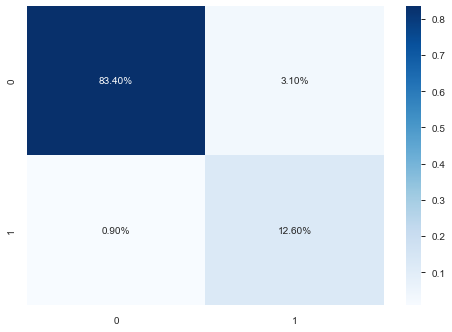

In [111]:
#Confusion Matrix

import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Predicting performance of hypertuned Logistic Regression model

pred_val = log_reg.predict(X_val)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

# Create Submission File on Test Data¶


In [112]:
#Text Preprocessing


# Remove ,,, from entries in name column
test_df['sms_text'] = test_df['sms_text'].str.replace(r'\,,,','')
test_df['sms_text'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
test_df['sms_text']=test_df['sms_text'].apply(lambda x:expand_contractions(x))

#Lowercase letters
test_df['sms_text']=test_df['sms_text'].str.lower()

#Remove digits and words containing digits 
test_df['sms_text']=test_df['sms_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
test_df['sms_text']=test_df['sms_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(test_df['sms_text']).split()).value_counts()[:10]
freq


# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test_df['sms_text'] = test_df['sms_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(test_df)

#Lemmatization

from textblob import Word
test_df['sms_text'] = test_df['sms_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_df['sms_text'].head()

#Sentiment Analysis 
from textblob import TextBlob
test_df['polarity']=test_df['sms_text'].apply(lambda x:TextBlob(x).sentiment.polarity)

test_df['word_count'] = test_df['sms_text'].apply(lambda x: len(str(x).split(" ")))
test_df[['sms_text','word_count']].head()

test_df['word_count'] = test_df['sms_text'].apply(lambda x: len(str(x).split(" ")))
test_df[['sms_text','word_count']].head()


array(['hot live fantasy call per min ntt ltd po box croydon k',
       'home lei',
       'scotland hope showing jjc tendency take care live dream',
       'yo around friend mine lookin pick later tonight',
       'aight wat happening side',
       'sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect end reply end sptv',
       'taking derek taylor walmart back time done leave mouse desk text priscilla ready',
       'okay name ur price long legal wen pick u ave x xx',
       'kallis ready bat inning', 'get unless guy want come time sooner',
       'shall come get pickle', 'carry disturbing',
       'hi dis yijue would happy work wif u', 'need coz never go',
       'sm ac blind date aberdeen united kingdom check httpimg sm acw blind date send hide',
       'see message r u leaving congrats dear school wat r ur plan',
       'idea', 'hello site download song urgent pls',
       'u studying sch going home anyway ill b going sch later',
       'thank like well'

u       108
call     61
ur       47
know     35
day      32
ok       32
get      30
good     29
£        28
go       28
dtype: int64

        id                                           sms_text  polarity  \
0    12000  hot live fantasy call per min ntt ltd po box c...  0.193182   
1    12001                                           home lei  0.000000   
2    12002  scotland hope showing jjc tendency take care l...  0.136364   
3    12003    yo around friend mine lookin pick later tonight  0.000000   
4    12004                           aight wat happening side  0.000000   
..     ...                                                ...       ...   
554  12554  great role model giving much really wish day m...  0.475000   
555  12555  awesome remember last time got somebody high f...  0.352500   
556  12556  prize go another customer tc wwwtcbiz min polo...  0.050000   
557  12557  sm ac jsco energy high u may know ur leadershi...  0.296667   
558  12558                               shall call dear food  0.000000   

     word_count  
0            12  
1             2  
2             9  
3             8  
4        

0    hot live fantasy call per min ntt ltd po box c...
1                                             home lei
2    scotland hope showing jjc tendency take care l...
3      yo around friend mine lookin pick later tonight
4                             aight wat happening side
Name: sms_text, dtype: object

,sms_text,word_count
0,hot live fantasy call per min ntt ltd po box c...,12
1,home lei,2
2,scotland hope showing jjc tendency take care l...,9
3,yo around friend mine lookin pick later tonight,8
4,aight wat happening side,4


,sms_text,word_count
0,hot live fantasy call per min ntt ltd po box c...,12
1,home lei,2
2,scotland hope showing jjc tendency take care l...,9
3,yo around friend mine lookin pick later tonight,8
4,aight wat happening side,4


In [113]:
#Test Dataset Text Vectorizer  

#fit the vectorizers to the test data

features1 = vectorizer.transform(test_df['sms_text'])
pandaframe1 = pd.DataFrame(features1.toarray(), columns=vectorizer.get_feature_names())

df4=test_df[['polarity','word_count']]

df5= pd.concat([pandaframe1.reset_index(drop=True), df4.reset_index(drop=True)], axis=1)

In [114]:
# Make sure to transform/create the features the same way you did for training


X_test = df5

# Use your model to make predictions
pred_test = log_reg.predict(X_test)

print(pred_test)

my_submission = pd.DataFrame({'id': test_df.id, 'predicted': pred_test})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/Kaggle_14.csv', index=False)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


In [31]:
df5

,ask,babe,buy,care,cash,claim,come,contact,customer,da,...,way,week,win,word,work,yeah,year,yes,polarity,word_count
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.193182,12
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
2,0.0,0.0,0.0,0.732499,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364,9
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,8
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475000,23
555,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352500,11
556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.51608,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,15
557,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296667,21


In [115]:
from sklearn.model_selection import GridSearchCV

#Logistic Regression classifier with hyperparameter tuning 

parameters_grid = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga']}

# Create grid search object

LogReg_grid = GridSearchCV(LogisticRegression(random_state=42), parameters_grid, cv=5, n_jobs=-1, scoring='f1')

# Fit on data

%time LogReg_grid.fit(X_train, y_train)

LogReg_grid.best_params_ # printing out best parameters

Wall time: 7min 6s


C:\Users\anuj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='f1')

{'C': 1,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'saga'}

In [116]:
#Hypertuned Logistic Regression Result

# Use your model to make predictions
pred_test = LogReg_grid.predict(X_test)

print(pred_test)

my_submission = pd.DataFrame({'id': test_df.id, 'predicted': pred_test})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/Kaggle_15.csv', index=False)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

,id,predicted
0,12000,0
1,12001,0
2,12002,0
3,12003,0
4,12004,0


In [117]:
#Setting up the Random Forest Classifier Hyperparameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto'], 'max_depth': [10, 12, 15, 17, 20, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [118]:
# Use the RF GridSearch to search for best hyperparameters
from sklearn.ensemble import RandomForestClassifier as RFC

rf_model = RFC(random_state=42)

rf = GridSearchCV(rf_model,random_grid, cv=3,verbose=10,scoring='f1',n_jobs=-1)

# Fit the random search model
rf.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 12, 15, 17, 20, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50]},
             scoring='f1', verbose=10)

In [119]:
#Hypertuned RF Result

# Use your model to make predictions
pred_test_rf = rf.predict(X_test)

# We will look at the predicted prices to ensure we have something sensible.
print(pred_test)

my_submission = pd.DataFrame({'id': test_df.id, 'predicted': pred_test_rf})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/Kaggle_16.csv', index=False)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


In [120]:
# Defining SVM hyperparameter tuning
from sklearn.svm import SVC
#Hypereparameter Grid
svm_grid = {'C': [0.1, 1, 10, 20, 90,100,120], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

#Defininf the SVM Model 
svm_model=SVC(random_state=42)  

#Defining the SVM grid search CV model 
svm = GridSearchCV(svm_model, svm_grid, refit = True, verbose = 10,n_jobs=-1,scoring='f1')
  
# fitting the model for grid search
svm.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed: 12

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 90, 100, 120],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1', verbose=10)

In [121]:
#Hypertuned SVM Result

# Use your model to make predictions
pred_test_svm = svm.predict(X_test)

print(pred_test)

my_submission = pd.DataFrame({'id': test_df.id, 'predicted': pred_test_svm})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/Kaggle_17.csv', index=False)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


In [39]:
#xgBoost

import xgboost as xgb

boost_grid = {'nthread': [4], 
              'objective': ['binary:logistic'],
              'learning_rate':[0.02,0.03,0.05,0.1,0.5,0.75],
              'max_depth': [3,5,6,10],
              'subsample':[0.5,0.8,1],
              'colsample_bytree':[0.5,0.7,1],
              'n_estimators':[int(x) for x in np.linspace(start = 5, stop = 100, num = 10)],
        } 
xgb_model=xgb.XGBClassifier(random_state=42)  


xgb = GridSearchCV(xgb_model, boost_grid, refit = True, verbose = 3,cv=3,scoring='f1')
  
# fitting the model for grid search
xgb.fit(X_train, y_train)


Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.386, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.488, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.384, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.428, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.514, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.581,

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.615, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.619, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.492, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.556, 

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.592, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.657, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.662, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.534, to

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.700, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.481, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.561, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.558,

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.759, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.634, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.690, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.703, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.776, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.667, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.710, 

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.671, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.721, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.799, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.559,

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.759, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.650, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.695, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.728, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.792, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.690, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.697, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.736, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.800, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, sc

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.799, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.740, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.734, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.81

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.760, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.819, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.715, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, scor

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.729, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.763, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.821, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsam

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.603, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.553, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.626, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.652, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.664, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.607, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.664, 

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.638, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.699, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.732, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.644, 

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.616, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.667, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.729, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.784, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.667, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.723, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.738, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.800, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.708, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.732, 

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.703, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.747, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.659, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.688

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.674, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.715, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.804, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.812, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.695, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.744, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.738, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.810, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.738, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.771, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.756, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.823, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.853, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.732, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.767, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, 

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.588, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.603, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.520, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.613, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.697, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.711, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.6

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.776, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.686, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.703, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.780, tota

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.688, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.599, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.676, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.730, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.796, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.679, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.717, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.750, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.817, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.7

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.659, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.630, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.657, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.693, total=   0.

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.726, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.793, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.693, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.742

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.735, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.757, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.831, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.720, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.647, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.688, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.769, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.836, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.777, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.791, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.771, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.851, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.847, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.448, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.522, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.586, tota

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.776, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.664, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.707, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.769,

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.743, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.816, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.729, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.741, total= 

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.738, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.773, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.834, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.479, total=

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.808, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.690, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.742, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.816, t

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.774, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.846, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.777,

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.824, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.796, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.834, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.8

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.826, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.722, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.733, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.827, total=   0.

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.777, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.840, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.797, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.787, total

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.821, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.804, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.865, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.836, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.744, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.772, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.809, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.857, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.835, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.814, 

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.837, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.833, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.866, total=   1.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.828, 

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.795, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.783, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.832, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.808,

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.849, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.830, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.836, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.841,

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.829, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.855, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.832, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.831, total= 

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.838, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.832, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.792, total

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.840, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.818, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.868, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.822,

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.860, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.823, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.818, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.836,

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.824, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.803, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.783, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.839, total=   0.

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.821, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.843, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.830, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.821, total

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.833, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.820, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.856, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.835,

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.804, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.807, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.839, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.8

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.840, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.840, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.834, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.858, tota

[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.836, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.863, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.829, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.5, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.814

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.772, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.822, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.781, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.827, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.828, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.859, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=47, nthread=4, objective=binary:logistic, subsample=1, score=0.8

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.864, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.828, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.834, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=3, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.863, tota

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.805, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.789, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.782, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.818, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.848, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score=0.825, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.824, total=   0.8s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.802, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score=0.861, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=5, n_estimators=78, nthread=4, objective=binary:logistic, subsample=1, score=0.8

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.808, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.748, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.755, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.799, total=   0.

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.845, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, score=0.851, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.840, total=   0.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=47, nthread=4, objective=binary:logistic, subsample=0.5, score=0.822

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.840, total=   0.5s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.809, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.5, score=0.864, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=6, n_estimators=78, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.822, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.833, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score=0.844, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=36, nthread=4, objective=binary:logistic, subsample=1, sc

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.841, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.837, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.838, total=   0.7s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=68, nthread=4, objective=binary:logistic, subsample=1, score=0.83

[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.830, total=   1.3s
[CV] colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.75, max_depth=10, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.838, total=   1.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.512, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.5

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.562, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.625, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.629, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.654, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.559, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score=0.647, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.667, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.698, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=0.623, total=   0.7s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=100, nthread=4, objective=binary:logistic, subsample=1, score=

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.637, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.688, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.748, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=36, nthread=4, objective=binary:logistic, subsample=0.5, score=0.632, to

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.781, total=   0.7s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.645, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0.690, total=   0.7s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=68, nthread=4, objective=binary:logistic, subsample=0.5, score=0

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.707, total=   0.9s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.801, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8, score=0.678, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.686, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.703, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8, score=0.779, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=26, nthread=4, objective=binary:logistic, subsample=1, score=0.6

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.795, total=   0.7s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.692, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.723, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=57, nthread=4, objective=binary:logistic, subsample=1, score=0.804, tota

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.730, total=   0.9s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.816, total=   0.9s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0.701, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=6, n_estimators=100, nthread=4, objective=binary:logistic, subsample=0.5, score=0

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.707, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.741, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.814, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.819, total=   0.7s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.757, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score=0.767, total=   0.8s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.765, total=   2.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.831, total=   1.7s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=0.752, total=   2.8s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=89, nthread=4, objective=binary:logistic, subsample=1, score=

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.553, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.608, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.562, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=26, nthread=4, objective=binary:logistic, subsample=0.5, score=0.595

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.565, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.655, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.5, score=0.664, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=57, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.5, score=0.720, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.628, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score=0.690, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=89, nthread=4, objective=binary:logistic, subsample=0.8, score

KeyboardInterrupt: 

In [ ]:
#Hypertuned xgb Result

# Use your model to make predictions
pred_test_xg = xgb.predict(X_test)

print(pred_test)

my_submission = pd.DataFrame({'id': test_df.id, 'predicted': pred_test_xg})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/Kaggle_13.csv', index=False)

In [122]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

dt = DecisionTreeClassifier()
dtcv = GridSearchCV(dt, param_grid, cv=10,scoring="f1",verbose=10)

dtcv.fit(X_train,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.788, total=   2.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.827, total=   2.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.876, total=   2.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.857, total=   2.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   2.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.855, total=   1.9s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.812, total=   2.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.745, total=   1.9s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   16.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.868, total=   2.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.825, total=   1.9s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.832, total=   2.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.846, total=   1.9s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.857, total=   1.9s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_sample

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.788, total=   1.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.700, total=   1.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.843, total=   1.8s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.838, total=   1.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_sampl

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.687, total=   1.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.739, total=   1.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.742, total=   1.9s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.714, total=   1.6s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, 

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.659, total=   0.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.545, total=   0.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.564, total=   0.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.553, total=   0.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.651, total=   

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.698, total=   0.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.634, total=   0.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.698, total=   0.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.659, total=   0.4s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.545,

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.758, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.710, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.711, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.753, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.667, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.713, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.667, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.758, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.737, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.796, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.766, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.788, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, scor

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.768, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.788, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.816, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.745, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.840, t

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.756, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.673, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.758, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.742, total=   0.7s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.435, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.406, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.394, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.344, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.382, t

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.200, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.286, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.303, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.435, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.406, t

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.382, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.382, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.230, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.200, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.312, total=   0.3s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.317, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.406, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.382, total=   0.4s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.230, total=   0.4s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.200, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.400, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.394, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.317, total=   0.4s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.371, total=   0.4s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.358, total=   0.4s
[CV] 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.303, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.435, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.406, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.394, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.344, total=   0.3s
[CV] crit

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.194, total=   0.5s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.286, total=   0.5s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.299, total=   0.6s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.412, total=   0.4s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.400, total=   0.3s
[CV] 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.382, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.230, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.200, total=   0.5s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.312, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.303, total=   0.3s
[CV] 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.317, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.382, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.382, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.230, total=   0.3s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.200, total=   0.3s
[CV] 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.400, total=   0.3s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.719, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.721, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.642, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.753, total=   0

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.627, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.796, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.761, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.719, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.698, total=

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.667, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.622, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.697, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.651, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.553, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.651, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.585, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.575, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.698, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.564, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.553, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.651, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.585, total=   0.4s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.575, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.733, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.719, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.713, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.642, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.753, total=   0.5s
[CV] c

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.659, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.796, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.733, total=   0.9s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.719, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.713, total=   0.5s
[CV] 

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.622, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.697, total=   0.7s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.651, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.787, total=   0.8s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.717, total=   0

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.753, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.667, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.635, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.705, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.627, total=   0.7s
[CV] criterion

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.667, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.612, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.705, total=   0.6s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.667, total=   0.5s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.622, total=   0

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.833, total=   0.8s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.800, total=   0.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.833, total=   1.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.791, total=   0.8s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.681, total=   0.8s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.711, total=   0.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.696, total=   0.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.796, total=   0.9s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score

KeyboardInterrupt: 

In [ ]:
#Hypertuned decision tree result

# Use your model to make predictions
pred_test_dt = dtcv.predict(X_test)


print(pred_test)

my_submission = pd.DataFrame({'id': test_df.id, 'predicted': pred_test_dt})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Kaggle/Kaggle_18.csv', index=False)